# 决策边界

$
\hat y = 
\begin{cases}
1, \hat p\ \geqslant \ 0.5 \ (\theta ^T\cdot x_b \geqslant 0)\\
0, \hat p\ <\ 0.5 \ (\theta ^T\cdot x_b < 0) \\
\end{cases}
$

将$\theta ^T\cdot x_b = 0$ 称决策边界

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target

X = X[y<2,:2]
y = y[y<2]

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

log_reg = LogisticRegressionCV()
log_reg.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

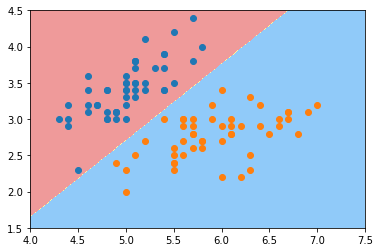

In [3]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)
    
plot_decision_boundary(log_reg, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

## 逻辑回归中添加多项式特征

In [4]:
np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2))
# 圆的方程
y = np.array(X[:,0]**2 + X[:,1]**2 < 1.5, dtype='int')

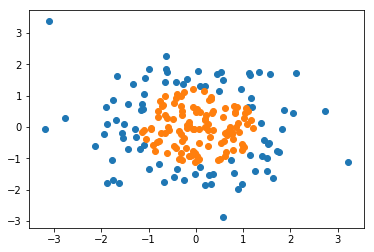

In [5]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [6]:
log_reg = LogisticRegressionCV()
log_reg.fit(X, y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [7]:
log_reg.score(X, y)

0.59499999999999997

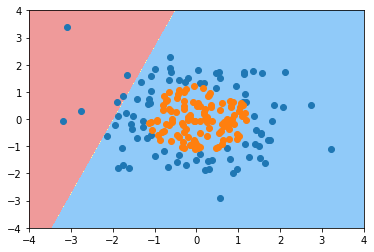

In [8]:
plot_decision_boundary(log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegressionCV())
    ])

In [10]:
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0))])

In [11]:
poly_log_reg.score(X, y)

1.0

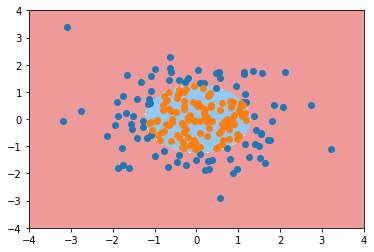

In [12]:
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()